# Intervalos de Confiança

# Média da amostra e média populacional

A média das amostras e a média populacional são diferentes. Geralmente, queremos saber sobre uma média de população, mas podemos calcular apenas uma média de amostra. Usamos intervalos de confiança na tentativa de determinar com quanta precisão nossa média estimada da amostra qaproxima a média da população.

## Intervalo de confiança

Se fosse requisitado, por exemplo, que fosse feita uma estimativa da altura média de uma mulher nos Brasil, poderiamos fazer isso tomando a altura de 10 mulheres e estimando que a média dessa amostra era próxima da população. Vamos tentar isso.

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# We'll set a seed here so our runs are consistent
np.random.seed(10)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 10
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
print(heights)
mean_height = np.mean(heights)
print('Média da amostra: ', mean_height)

[70.65793252 67.57639487 56.27299854 63.95808075 67.10667987 60.3995722
 65.32755793 64.54274263 64.02145715 63.12699895]
Média da amostra:  64.29904154070394


Infelizmente, simplesmente estimar a média da amostra não nos diz muito, pois não sabemos como isso se relaciona com a média da população. Para ter uma idéia de como pode ser esta relação, podemos estimar a variância de nossa amostra. Variância alta indica instabilidade e incerteza.

In [3]:
print('Variância da amostra: ', np.var(heights))

Variância da amostra:  14.136682713658406


Isso ainda não faz tanto por nós, para realmente ter uma noção de como a média da amostra se relaciona com a média da população precisamos calcular o erro padrão. O erro padrão é uma medida da variância da média da amostra.

#### IMPORTANTE
A computação de um erro padrão envolve assumir que a maneira como você amostra não adiciona viés e que os dados são normais e independentes. Se essas condições forem violadas, seu erro padrão estará errado. Existem maneiras de testar e corrigir isso.

A fórmula para erro padrão é.

$$ SE = \frac {\sigma} {\sqrt {n}} $$

Onde $ \sigma $ é o desvio padrão da amostra e $ n $ é o número de amostras.

In [4]:
SE = np.std(heights) / np.sqrt(sample_size)
print('Erro padrão: ', SE)

Erro padrão:  1.1889778262717268


Existe uma função na biblioteca de estatísticas de Scipy para calcular o erro padrão. Observe que esta função, por padrão, contém uma correção de graus de liberdade que muitas vezes não é necessária (para amostras suficientemente grandes, é efetivamente irrelevante). Você pode omitir a correção configurando o parâmetro `ddof` para 0.

In [5]:
stats.sem(heights, ddof=0)

1.1889778262717268

Supondo que nossos dados sejam normalmente distribuídos, podemos usar o erro padrão para calcular nosso intervalo de confiança. Para fazer isso, primeiro estabelecemos o nível de confiança desejado, digamos 95%, então determinamos quantos desvios padrão contém 95% da massa. Acontece que os 95% da massa situa-se entre -1,96 e 1,96 em uma distribuição normal normal. Quando as amostras são grandes o suficiente (geralmente> 30 é tomado como um limiar), o teorema do limite central aplica-se e a normalidade pode ser assumida com segurança; Se o tamanho da amostra for menor, uma abordagem mais segura é usar uma distribuição $ t $ com graus de liberdade adequadamente especificados. A maneira real de calcular os valores é usando uma função de distribuição cumulativa (CDF). Se você não está familiarizado com CDFs, CDFs inversos e seus PDFs complementares, você pode ler sobre eles [aqui] (https://en.wikipedia.org/wiki/Probability_density_function) e [aqui] (https: // en. wikipedia.org/wiki/Cumulative_distribution_function). Olhe [aqui] (https://en.wikipedia.org/wiki/Student%27s_t-distribution) para obter informações sobre a distribuição $ t $. Podemos verificar o número de 95% usando uma das funções do Python.

Podemos visualizar os limites de massa de 95% aqui.

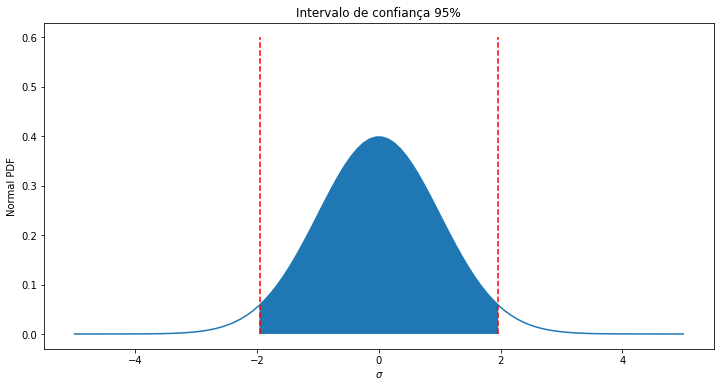

In [6]:
# Set up the x axis
x = np.linspace(-5,5,100)
# Here's the normal distribution
y = stats.norm.pdf(x,0,1)

plt.figure(figsize=(12,6))
plt.title("Intervalo de confiança 95%")
# plt.grid(linestyle='--')
plt.plot(x,y)

# Plot our bounds
plt.vlines(-1.96, 0, 0.6, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 0.6, colors='r', linestyles='dashed')

# Shade the area
fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF');

### Erros comuns

Agora, ao invés de relatar a média da amostra, sem qualquer medida da probabilidade de esta estar correta, podemos calcular um intervalo e ser muito mais confiantes de que a média da população se encontra nesse intervalo. Para fazer isso, tomamos a média da amostra $ \mu $ e informamos $ \left (\mu-1.96 SE, \mu + 1.96SE \right) $.

Isso funciona porque, assumindo a normalidade, esse intervalo conterá a média da população 95% do tempo.

Vale notar que o valor real da estimativa e os intervalos de confiança são fixos. É incorreto dizer que "A média nacional da altura da população do sexo feminino esta entre 1,5m e 1,7, com 95% de probabilidade.", mas infelizmente este é um erro comum. Ao invés disso, o "95%" se refere ao fato de que dentro de muitos calculos do intervalo de confiança de 95%, o valor real estará dentro do intervalo em 95% dos casos (assumindo valibração correta do intervalo de confiança, o que discutiremos a seguir). Mas de fato, para uma única amostra e um único intervalo de confiança calculado desta, não temos maneiras de estimar a probabilidade do intervalo conter a média da população. A visualização abaixo demonstra este fato.

No bloco de código abaixo, há duas coisas a serem observadas. Primeiro, embora o tamanho da amostra seja suficientemente grande para assumir a normalidade, estamos usando uma distribuição $ t $, apenas para demonstrar como ela é usada. Em segundo lugar, os valores de $ t $ necessários (análogos aos $ \ pm1.96 $ usados acima) estão sendo calculados a partir da função de densidade cumulativa invertida, o ppf em scipy.stats. A distribuição $ t $ requer os graus de liberdade de parâmetro extra (d.o.f), que é o tamanho da amostra menos um.

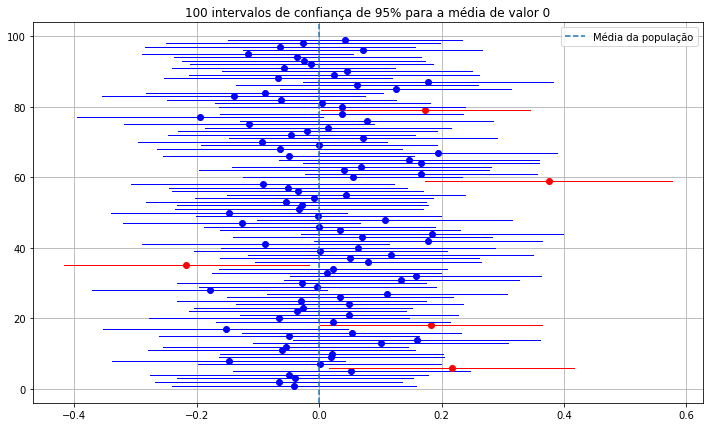

In [7]:
np.random.seed(8309)
n = 100 # number of samples to take
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(12, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])  # calculate sample mean
    se = stats.sem(samples[i])  # calculate sample standard error
    h = se*stats.t.ppf((1+0.95)/2, len(samples[i])-1) # calculate t; 2nd param is d.o.f. 
    sample_ci = [sample_mean - h, sample_mean + h]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Média da população');
plt.legend(loc='best');
plt.grid()
plt.title('100 intervalos de confiança de 95% para a média de valor 0');

### Leitura Adicional

Esta é apenas uma breve introdução, a Wikipedia tem excelentes artigos detalhando esses assuntos em maior profundidade. Vamos voltar ao nosso exemplo de alturas. Como o tamanho da amostra é pequeno, usaremos um teste $ t $.

In [8]:
# standard error SE was already calculated
t_val = stats.t.ppf((1+0.95)/2, 9)  # d.o.f. = 10 - 1
print('Altura média da amostra:', mean_height)
print('Valor-t:', t_val)
print('Erro padrão:', SE)
print('Intervalo de confiança:', (mean_height - t_val * SE, mean_height + t_val * SE))

Altura média da amostra: 64.29904154070394
Valor-t: 2.2621571627409915
Erro padrão: 1.1889778262717268
Intervalo de confiança: (61.60938683466314, 66.98869624674474)


Há uma função interna em scipy.stats para calcular o intervalo. Lembre-se de especificar os graus de liberdade.

In [9]:
print('Intervalo de confiança de 99%:', stats.t.interval(0.99, df=9, loc=mean_height, scale=SE))
print('Intervalo de confiança de 95%:', stats.t.interval(0.95, df = 9, loc=mean_height, scale=SE))
print('Intervalo de confiança de 80%:', stats.t.interval(0.8, df = 9, loc=mean_height, scale=SE))

Intervalo de confiança de 99%: (60.43505913983995, 68.16302394156793)
Intervalo de confiança de 95%: (61.60938683466314, 66.98869624674474)
Intervalo de confiança de 80%: (62.65465103765395, 65.94343204375393)


Observe que à medida que sua confiança aumenta, o intervalo necessariamente aumenta.

Assumindo normalidade, existe também uma função interna para calcular o intervalo de confiança. Desta vez você não precisa especificar os graus de liberdade. Observe que, em um nível de confiança correspondente, o intervalo calculado usando a distribuição normal é mais restrito do que o intervalo calculado usando a distribuição $ t $.

In [10]:
print(stats.norm.interval(0.99, loc=mean_height, scale=SE))
print(stats.norm.interval(0.95, loc=mean_height, scale=SE))
print(stats.norm.interval(0.80, loc=mean_height, scale=SE))

(61.23643761452335, 67.36164546688453)
(61.968687822794635, 66.62939525861324)
(62.77530514604759, 65.82277793536029)


## O que isto significa?

Os intervalos de confiança nos permitem definir nossa confiança desejada e, em seguida, informar um intervalo que provavelmente conterá a média da população. Quanto maior nossa confiança desejada, maior o alcance relatado. Em geral, nunca se pode relatar um único valor pontual, porque a probabilidade de que qualquer ponto seja a média real da população é incrivelmente pequena. Vamos ver como nossos intervalos diminuem quando mudamos o tamanho da amostra.

In [11]:
np.random.seed(10)

sample_sizes = [10, 100, 1000]
for s in sample_sizes:
    heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print(stats.norm.interval(0.95, loc=mean_height, scale=SE))

(61.968687822794635, 66.62939525861324)
(63.343692029946574, 65.2543910514613)
(64.00593339807287, 64.59214968333501)


## Visualizando os intervalos

A seguir, mostraremos os intervalos de confiança nas distribuições.

63.588854219913536 65.57346359543473


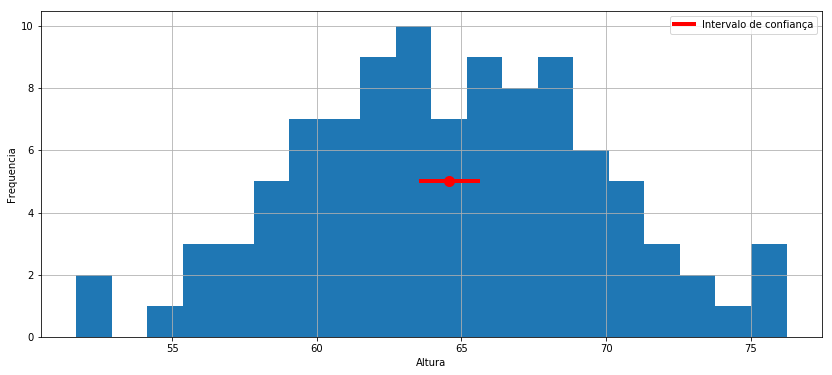

In [12]:
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print(l, u)

plt.figure(figsize=(14,6))
plt.grid()
plt.hist(heights, bins=20)
plt.xlabel('Altura')
plt.ylabel('Frequencia')

# Just for plotting
y_height = 5
plt.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Intervalo de confiança')
plt.plot(np.mean(heights), y_height, 'o', color='r', markersize=10);
plt.legend();

## Má Calibração e Violação de Suposições

O cálculo dodesvio padrão, erro padrão e intervalo de confiança depende de certas suposições. Se essas suposições forem violadas, o intervalo de confiança de 95% não conterá necessariamente o parâmetro da população 95% do tempo. Dizemos que, neste caso, o intervalo de confiança é mau calibrado. Exemplificamos a seguir:

### Exemplo: Dados Autocorrelacionados

Se o processo de geração de dados for autocorrelacionado, as estimativas do desvio padrão serão incorretas. Isso ocorre porque os processos autocorrelacionados tendem a produzir valores mais extremos do que os processos normalmente distribuídos. Isso ocorre porque os novos valores dependem de valores anteriores, entao as séries que já estão longe da média provavelmente ficarão longe da média. Para verificar isso, geraremos alguns dados autocorrelacionados de acordo com o processo a seguir.

$$X_t = \theta X_{t-1} + \epsilon$$
$$\epsilon \sim \mathcal{N}(0,1)$$

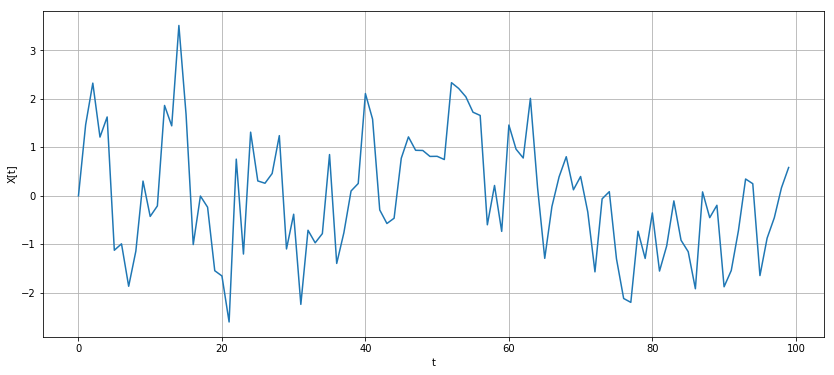

In [13]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    # Initialize the array
    X = np.zeros((N, 1))
    
    for t in range(1, N):
        # X_t = theta * X_{t-1} + epsilon
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

X = generate_autocorrelated_data(0.5, 0, 1, 100)

plt.figure(figsize=(14,6))
plt.grid()
plt.plot(X);
plt.xlabel('t');
plt.ylabel('X[t]');

Acontece que, para tamanhos de amostra maiores, teremos que a média da amostra convergirá assintoticamente para zero. Isso ocorre porque o processo ainda está centrado em torno de zero, mas vamos verificar se isso é verdade. Vamos variar o número de amostras tomadas e procurar convergência à medida que aumentamos o tamanho da amostra.

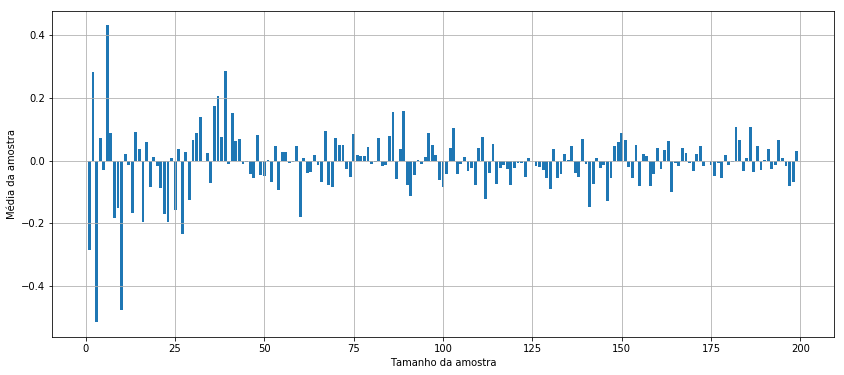

In [14]:
sample_means = np.zeros(200-1)
for i in range(1, 200):
    X = generate_autocorrelated_data(0.5, 0, 1, i * 10)
    sample_means[i-1] = np.mean(X)
    
plt.figure(figsize=(14,6))
plt.grid()
plt.bar(range(1, 200), sample_means);
plt.xlabel('Tamanho da amostra');
plt.ylabel('Média da amostra');

Aparentemente tendemos a convergencia. Podemos também inferir a média das amostras das médias.

In [15]:
np.mean(sample_means)

-0.008571996202976648

Muito perto de zero. Poderíamos também derivar simbolicamente que a média é zero, mas vamos, por hora, nos contentar com a análise empírica. Agora que sabemos a média da população, podemos verificar a calibração dos intervalos de confiança. Primeiro, vamos escrever duas funções auxiliares que calculam um intervalo para alguns dados de entrada e verificar se o intervalo contém a média real, 0.

In [16]:
def compute_unadjusted_interval(X):
    T = len(X)
    # Compute mu and sigma MLE
    mu = np.mean(X)
    sigma = np.std(X)
    SE = sigma / np.sqrt(T)
    # Compute the bounds
    return stats.norm.interval(0.95, loc=mu, scale=SE)

# We'll make a function that returns true when the computed bounds contain 0
def check_unadjusted_coverage(X):
    l, u = compute_unadjusted_interval(X)
    # Check to make sure l <= 0 <= u
    if l <= 0 and u >= 0:
        return True
    else:
        return False

Agora vamos executar muitas tentativas, em cada uma vamos amostrar alguns dados, calcular um intervalo de confiança e, em seguida, verificar se o intervalo de confiança contém a média da população. Manteremos uma contagem contínua e devemos esperar que 95% das tentativas sejam bem-sucedidas se os intervalos forem calibrados corretamente.

In [17]:
T = 100
trials = 500
times_correct = 0
for i in range(trials):
    X = generate_autocorrelated_data(0.5, 0, 1, T)
    if check_unadjusted_coverage(X):
        times_correct += 1
    
print('Estimativa Empírica: ', times_correct/float(trials))
print('Estimativa esperada: ', 0.95)

Estimativa Empírica:  0.732
Estimativa esperada:  0.95


Claramente a estimativa está errada. Nesse caso, precisaríamos fazer o que é conhecido como uma **correção de Newey-West** em nossa estimativa de erro padrão para considerar a autocorrelação. Na prática, é importante verificar as suposições que você faz. É rápido e fácil verificar se os seus dados são estacionários (o que implica não ser autocorrelacionado), e isso pode poupar muita dor e sofrimento no futuro. Um teste de normalidade como o `Jarque Bera` também será uma boa idéia, pois pode detectar certas propriedades de distribuição que podem violar as suposições de muitas análises estatísticas posteriores.